In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import datetime
from multihist import Hist1d, Histdd
import time
import itertools
import os
import math
from scipy import stats
from scipy.optimize import curve_fit
import pytz

import socket
import strax
import straxen
import cutax

from straxen import units
from straxen.get_corrections import get_correction_from_cmt
from cutax.cuts import *

%load_ext autoreload
%autoreload 2

#ddir = '/dali/lgrandi/dandrea/data'
ddir = '/home/dandrea/dali_backup/data/'

In [2]:
straxen.print_versions()

,module,version,path,git
0,python,3.8.10,/home/dandrea/jupyter/environment/bin/python,None
1,strax,1.4.0,/home/dandrea/jupyter/environment/lib/python3....,None
2,straxen,2.0.1,/home/dandrea/straxen/straxen,branch:master | 10c7521
3,cutax,1.13.0,/home/dandrea/cutax/cutax,branch:master | 09dc3db


In [3]:
st = cutax.contexts.xenonnt_online(cut_list=[cutax.cut_lists.basic.BasicCuts,
                                             cutax.cut_lists.kr83m.Kr83mSelection,
                                             cutax.cut_lists.s2width_test.S2Width])

In [6]:
dsets = st.select_runs(run_mode='background_linked',available='event_info')

Checking data availability:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
sr1_runs = dsets.name.values[:]

In [10]:
run_id = sr1_runs[0]
events = st.get_array(run_id,'event_info')

Loading event_info: |          | 0.00 % [00:00<?]

In [3]:
events = pd.read_pickle(f'{ddir}/SR1_bkg_047582_046335_EventInfo.pkl')

In [43]:
config = {'kr83m': {'s1': (100,700),    's2': (1e3, 2e4)} ,
          'Gamma': {'s1': (1e3, 3e4),   's2': (1e4, 1e6)}, 
          'Alpha': {'s1': (3.2e4, 9e4), 's2': (0.8e4, 5e4)},
          'ar37':  {'s1': (1., 40.),    's2': (200, 1e4)} ,
         }

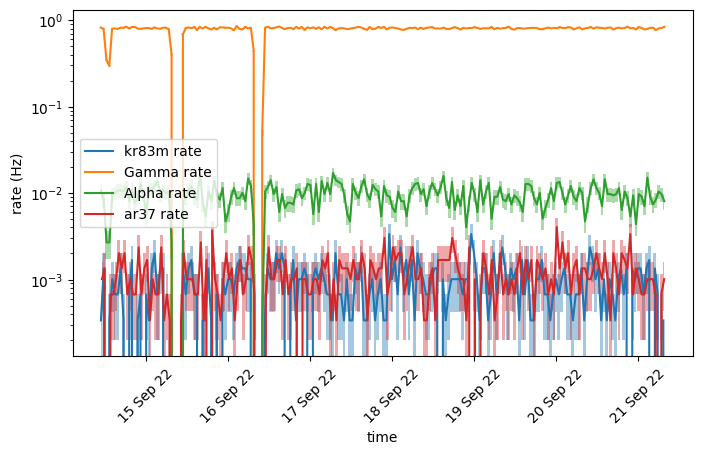

In [58]:
data_to_plot( events[:500000], config )